# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [4]:
data = data.iloc[:,1:]
data

,Longitude,Latitude,continent
0,-69.982677,12.520880,North America
1,66.004734,33.835231,Asia
2,17.537368,-12.293361,Africa
3,-63.064989,18.223959,North America
4,20.049834,41.142450,Europe
...,...,...,...
236,-172.164851,-13.753243,Oceania
237,47.586762,15.909280,Asia
238,25.083901,-29.000341,Africa
239,27.774759,-13.458242,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [8]:
np.unique(data['continent'])

array(['Africa', 'Antarctica', 'Asia', 'Europe', 'North America',
       'Oceania', 'Seven seas (open ocean)', 'South America'],
      dtype=object)

In [14]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'Africa':0, 'Antarctica':1, 'Asia':2, 'Europe':3, 'North America':4,
       'Oceania':5, 'Seven seas (open ocean)':6, 'South America':7})
data_mapped

,Longitude,Latitude,continent
0,-69.982677,12.520880,4
1,66.004734,33.835231,2
2,17.537368,-12.293361,0
3,-63.064989,18.223959,4
4,20.049834,41.142450,3
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,2
238,25.083901,-29.000341,0
239,27.774759,-13.458242,0


## Select the features

In [15]:
x = data_mapped.iloc[:,2:3]
x

,continent
0,4
1,2
2,0
3,4
4,3
...,...
236,5
237,2
238,0
239,0


## Clustering

Use 4 clusters initially.

In [25]:
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [26]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([1, 0, 2, 1, 4, 4, 4, 0, 3, 0, 1, 0, 1, 3, 1, 1, 4, 0, 2, 4, 2, 2,
       0, 4, 0, 1, 1, 4, 1, 4, 1, 1, 3, 3, 1, 0, 0, 2, 2, 4, 3, 0, 2, 2,
       2, 2, 1, 3, 2, 2, 1, 1, 1, 1, 0, 0, 4, 4, 2, 1, 4, 1, 2, 3, 2, 2,
       4, 4, 2, 4, 1, 3, 4, 4, 1, 2, 4, 0, 4, 2, 2, 2, 2, 2, 4, 1, 1, 1,
       1, 3, 0, 3, 1, 4, 1, 4, 0, 4, 0, 0, 3, 4, 0, 0, 4, 0, 4, 1, 4, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 4, 0, 0, 0, 2, 2, 1, 4, 0, 2, 4, 4, 4,
       0, 1, 2, 4, 4, 2, 3, 1, 1, 4, 2, 4, 0, 4, 0, 1, 2, 2, 1, 3, 2, 0,
       2, 1, 2, 1, 2, 1, 1, 4, 4, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1, 4, 1,
       0, 4, 3, 0, 1, 0, 4, 4, 2, 2, 0, 2, 2, 2, 0, 3, 3, 1, 2, 1, 4, 2,
       2, 1, 4, 2, 3, 4, 4, 4, 2, 1, 3, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 2, 4, 3, 1, 0, 4, 1, 3, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2])

In [27]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

,Longitude,Latitude,continent,Cluster
0,-69.982677,12.520880,4,1
1,66.004734,33.835231,2,0
2,17.537368,-12.293361,0,2
3,-63.064989,18.223959,4,1
4,20.049834,41.142450,3,4
...,...,...,...,...
236,-172.164851,-13.753243,5,1
237,47.586762,15.909280,2,0
238,25.083901,-29.000341,0,2
239,27.774759,-13.458242,0,2


## Plot the data

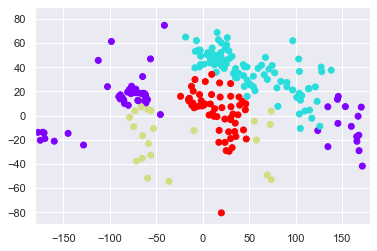

In [24]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.